In [1]:
import pyemu,os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Read in the PEST control file and residuals

In [2]:
inpstfile = os.path.join('..','9_Pilot_Points','reg4','chip_pp_reg4.pst')

In [3]:
inpst = pyemu.Pst(inpstfile)

### Check out the current arrangement of components

In [4]:
inpst.phi

753129.0431619929

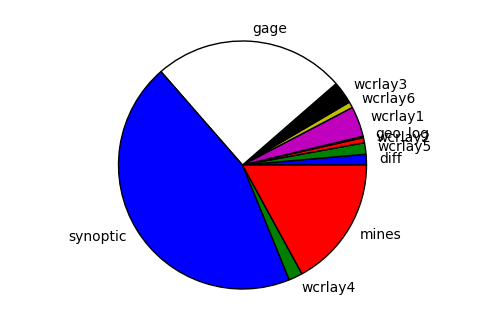

In [5]:
starting_components = inpst.phi_components_normalized
plt.axis('equal')
plt.pie([float(v) for v in starting_components.values()], labels=[k for k in starting_components.keys()]);

In [6]:
groups = [i  for i in np.unique(inpst.obs_data.obgnme) if 'regul' not in i]
groups

['diff',
 'gage',
 'geo_log',
 'mines',
 'synoptic',
 'wcrlay1',
 'wcrlay2',
 'wcrlay3',
 'wcrlay4',
 'wcrlay5',
 'wcrlay6']

In [7]:
newcomponents = dict(zip(groups,[i*inpst.phi for i in [0.005,0.2, 0.05, 0.1, 0.23, .1, .025, .025, .025, .12, 0.12]]))

In [8]:
sum(newcomponents.values())

753129.0431619929

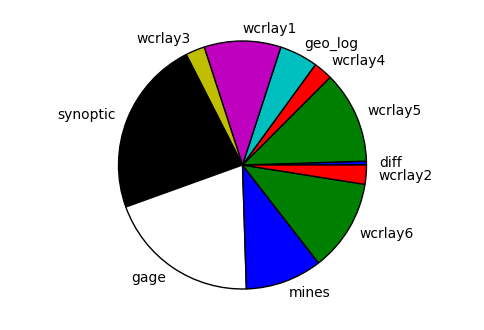

In [9]:
plt.axis('equal')
plt.pie([float(v) for v in newcomponents.values()], labels=[k for k in newcomponents.keys()]);

In [10]:
outpst=pyemu.Pst(inpstfile)



In [11]:
newcomponents

{'diff': 3765.6452158099646,
 'gage': 150625.80863239858,
 'geo_log': 37656.452158099644,
 'mines': 75312.90431619929,
 'synoptic': 173219.67992725837,
 'wcrlay1': 75312.90431619929,
 'wcrlay2': 18828.226079049822,
 'wcrlay3': 18828.226079049822,
 'wcrlay4': 18828.226079049822,
 'wcrlay5': 90375.48517943914,
 'wcrlay6': 90375.48517943914}

In [12]:
outpst.phi_components

{'diff': 10459.727095627803,
 'gage': 188506.76524168425,
 'geo_log': 1350.7013920106901,
 'mines': 128343.08792101296,
 'synoptic': 336909.6974437589,
 'wcrlay1': 29697.919805378373,
 'wcrlay2': 5123.379530922814,
 'wcrlay3': 22031.204848133442,
 'wcrlay4': 13590.328997623195,
 'wcrlay5': 11229.185081743444,
 'wcrlay6': 5887.045804096975}

In [13]:
outpst.adjust_weights(obsgrp_dict=newcomponents)
outpst.phi_components


{'diff': 3765.6452158099646,
 'gage': 150625.8086323986,
 'geo_log': 37656.452158099644,
 'mines': 75312.90431619927,
 'synoptic': 173219.67992725834,
 'wcrlay1': 75312.90431619923,
 'wcrlay2': 18828.22607904983,
 'wcrlay3': 18828.22607904979,
 'wcrlay4': 18828.22607904984,
 'wcrlay5': 90375.4851794391,
 'wcrlay6': 90375.48517943917}

In [14]:
newcomponents

{'diff': 3765.6452158099646,
 'gage': 150625.80863239858,
 'geo_log': 37656.452158099644,
 'mines': 75312.90431619929,
 'synoptic': 173219.67992725837,
 'wcrlay1': 75312.90431619929,
 'wcrlay2': 18828.226079049822,
 'wcrlay3': 18828.226079049822,
 'wcrlay4': 18828.226079049822,
 'wcrlay5': 90375.48517943914,
 'wcrlay6': 90375.48517943914}

In [15]:
outpst.write(inpstfile.replace('4.pst','4bal.pst'))